# **1. Perkenalan Dataset**


## **Analisis Faktor Risiko Diabetes Tipe 2**


---

### Latar Belakang
Diabetes tipe 2, yang merupakan bagian dari diabetes melitus merupakan penyakit metabolik kronis yang ditandai dengan ketidakmampuan tubuh menggunakan insulin secara efektif. Kondisi ini disebut resistensi insulin, yaitu kondisi dimana pankreas tidak mampu memproduksi insulin yang cukup untuk menjaga kadar gula darah tetap normal.

Penyakit ini berkembang perlahan, sering tanpa gejala jelas pada tahap awal, sehingga banyak orang tidak sadar mengidapnya hingga komplikasi mulai muncul. Ada banyak fahtor yang mempengaruhi seperti riwayat keluarga, pola makan, stres, faktor genetik, indeks masa tubuh, dan bahkan kebiasaan pola hidup seperti merokok, minum alkohol, dan pola tidur.

Diabetes melitus cukup berbahaya dan jika tidak ditangani dapat mengakibatkan berbagai komplikasi seperti penyakit jantung, kerusakan saraf, kerusakan ginjal, dan lainnya. Oleh karena itu, diperlukan upaya pencegahan dan deteksi dini untuk mengurangi risiko dan dampak diabetes.

Dataset diabetes_dataset_2019_raw.csv merupakan dataset yang dikumpulkan oleh Tigga dan Garg dari departemen Ilmu Komputer dan Teknik, BIT Mesra pada tahun 2020. Dataset ini berisi 952 data responden yang diambil dari kuesioner online dan offline yang berisi 18 pertanyaan terkait kesehatan, pola hidup, dan latar belakang keluarga. Pengumpulan data ini dilakukan sebagai respons terhadap tingginya jumlah penderita diabetes di India, sehingga diperlukan analisis faktor risiko untuk mendukung deteksi dini dan upaya pencegahan.

Variabel target pada penelitian ini adalah 'Diabetic', yaitu variabel biner yang menunjukkan apakah responden memiliki kondisi diabetes (1 = Diabetic) atau tidak (0 = Non-Diabetic). Variabel ini nantinya digunakan sebagai dasar klasifikasi untuk melihat pengaruh berbagai faktor gaya hidup, kesehatan, dan riwayat keluarga terhadap kemungkinan seseorang mengalami diabetes.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [79]:
from google.colab import drive
drive.mount('/content/drive')
url = "https://drive.google.com/uc?id=1k_zOv5hTR4SMfJ6IsOl-ZsiLLwqoendM"
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hour or more,39.0,no,no,8,6,no,occasionally,sometimes,High,0,no,not much,no
1,50-59,Male,no,yes,less than half an hour,28.0,no,no,8,6,yes,very often,sometimes,Normal,0,no,not much,no
2,40-49,Male,no,no,one hour or more,24.0,no,no,6,6,no,occasionally,sometimes,Normal,0,no,not much,no
3,50-59,Male,no,no,one hour or more,23.0,no,no,8,6,no,occasionally,sometimes,Normal,0,no,not much,no
4,40-49,Male,no,no,less than half an hour,27.0,no,no,8,8,no,occasionally,sometimes,Normal,0,no,not much,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [81]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               952 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        952 non-null    int64  
 15  Pdiabetes         952 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [82]:
# Periksa nilai null
df.isnull().sum()

,0
Age,0
Gender,0
Family_Diabetes,0
highBP,0
PhysicallyActive,0
BMI,0
Smoking,0
Alcohol,0
Sleep,0
SoundSleep,0


In [83]:
# Periksa nilai unik pada kolom kategorik
df.select_dtypes(include='object').nunique()

,0
Age,4
Gender,2
Family_Diabetes,2
highBP,2
PhysicallyActive,4
Smoking,2
Alcohol,2
RegularMedicine,2
JunkFood,4
Stress,4


In [84]:
# Melihat statistik deskriptif
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,952.000000,952.000000,952.000000,952.000000
mean,25.760504,6.949580,5.495798,0.352941
std,5.391448,1.273189,1.865618,0.885335
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


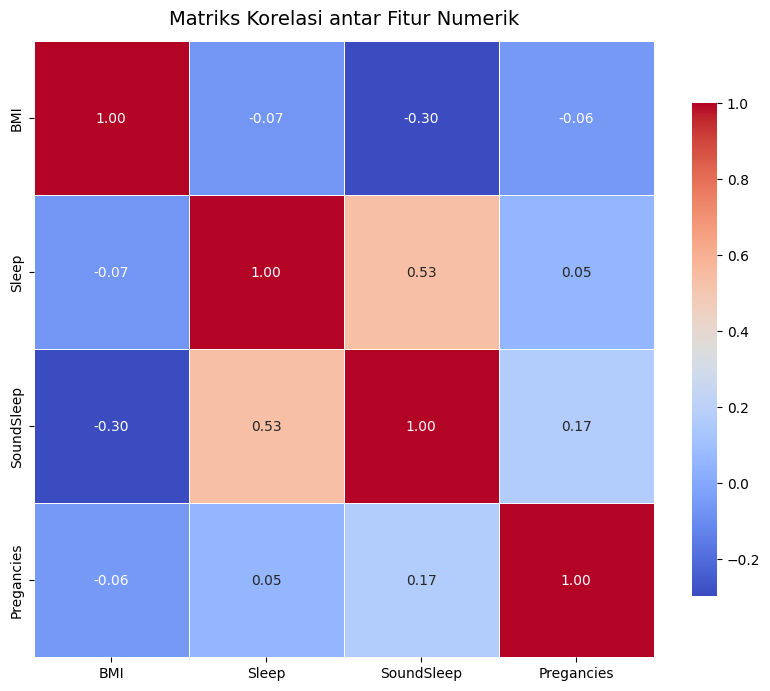

In [85]:
# Matriks korelasi
df_num = df.select_dtypes(include=["int64", "float64"])
corr_matrix = df_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=14, pad=12)
plt.show()

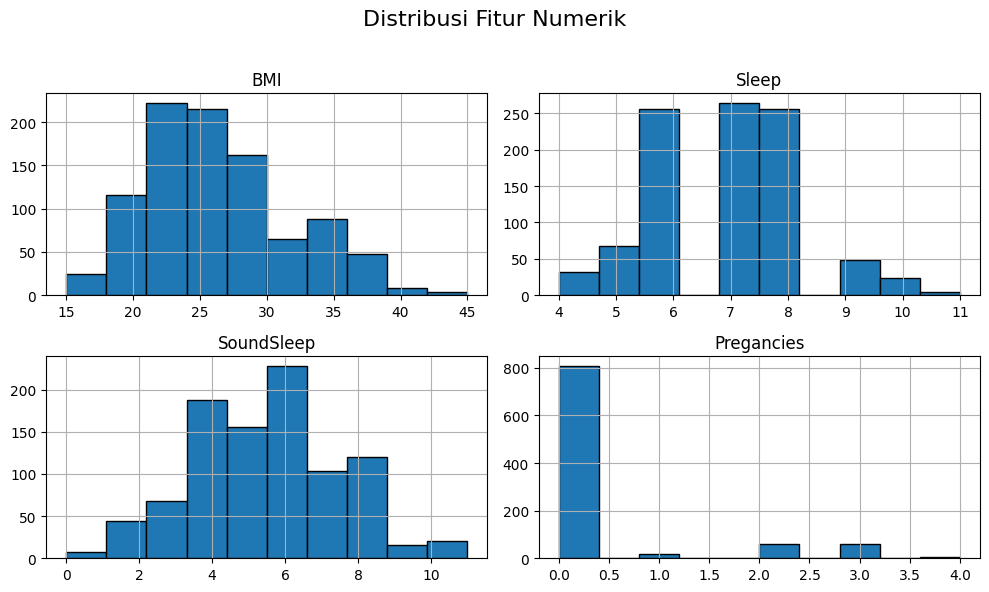

In [86]:
# Distribusi semua fitur numerik
df_num = df.select_dtypes(include=["int64", "float64"])

df_num.hist(
    figsize=(10,6),
    edgecolor="black"
)
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [87]:
numerical_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
categorical_cols = [col for col in df.columns if col not in numerical_cols]

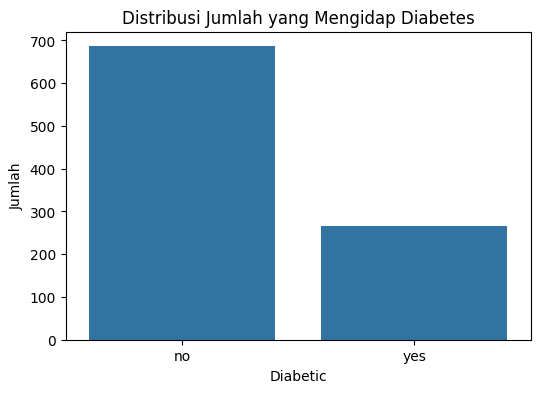

Diabetic
no     686
yes    266
Name: count, dtype: int64


In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Diabetic')
plt.title('Distribusi Jumlah yang Mengidap Diabetes')
plt.xlabel('Diabetic')
plt.ylabel('Jumlah')
plt.show()

# Proporsi
print(df['Diabetic'].value_counts())

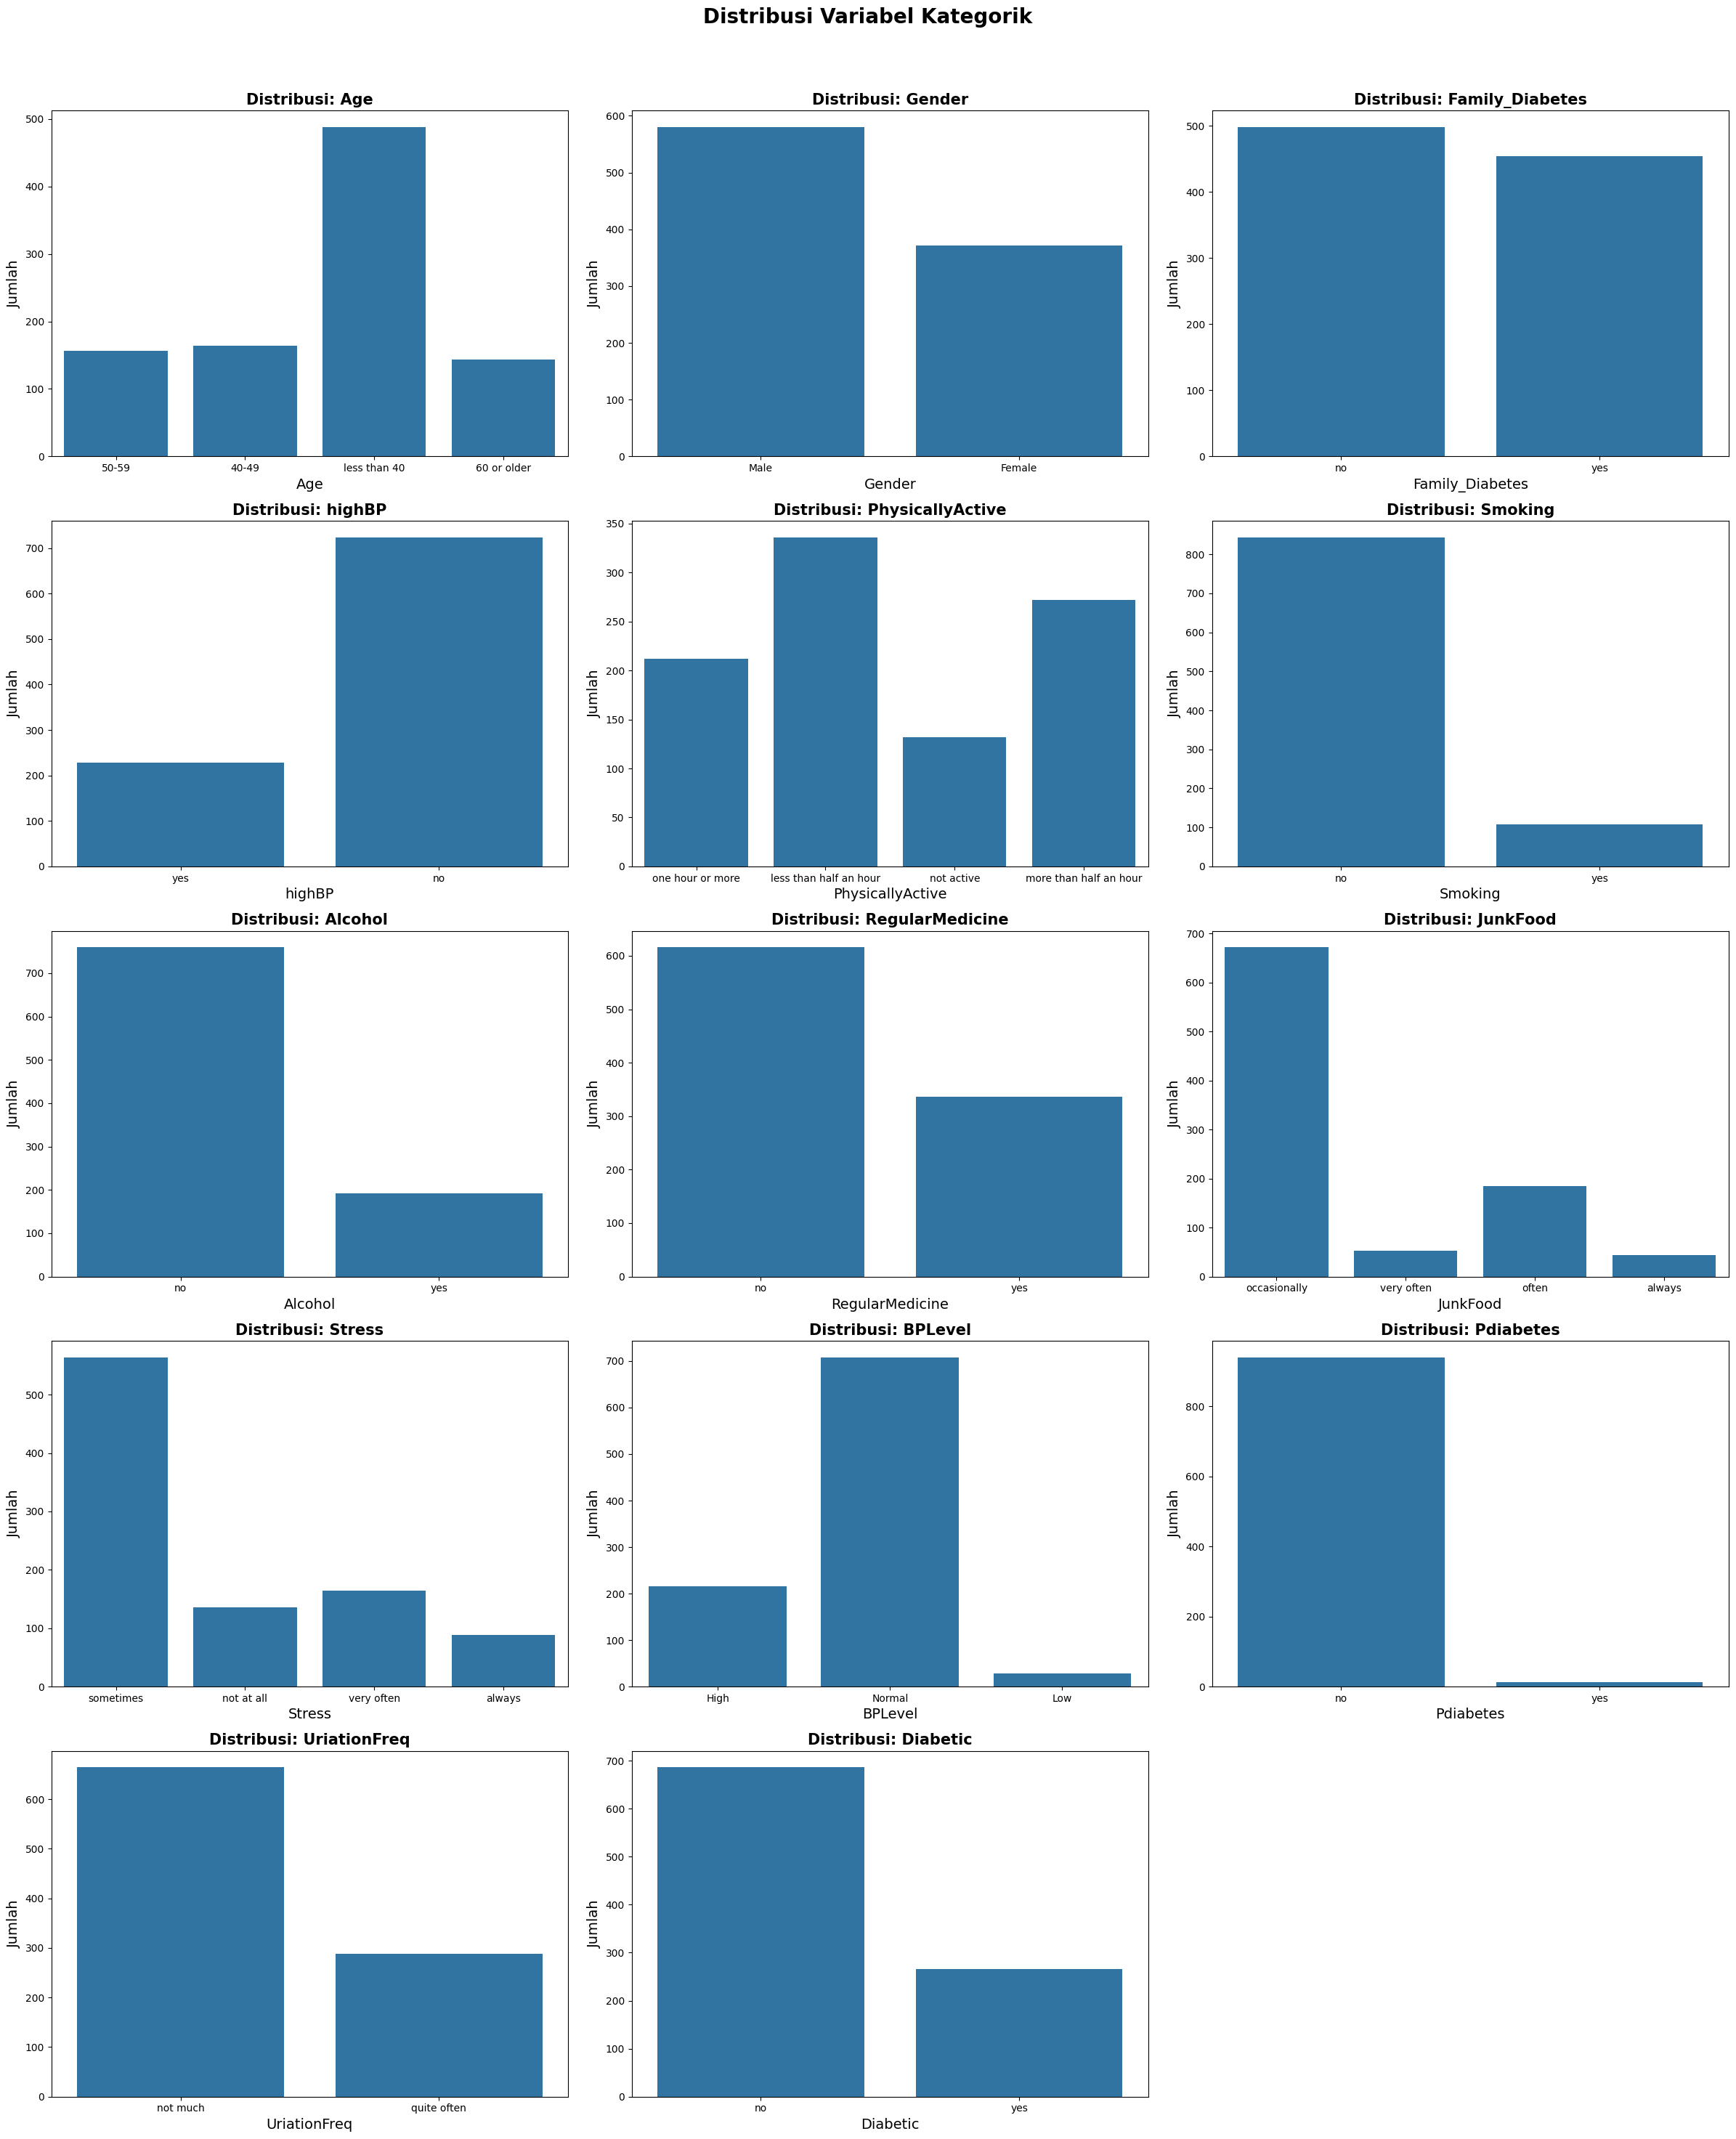

In [89]:
import math

# Hitung jumlah subplot yang dibutuhkan
num_cols = len(categorical_cols)
nrows = math.ceil(num_cols / 3)
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 6 * nrows))
fig.suptitle('Distribusi Variabel Kategorik', fontsize=20, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax)
    ax.tick_params(axis='x')
    ax.set_title(f'Distribusi: {col}', fontsize=15, fontweight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Jumlah', fontsize=14)

for j in range(num_cols, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

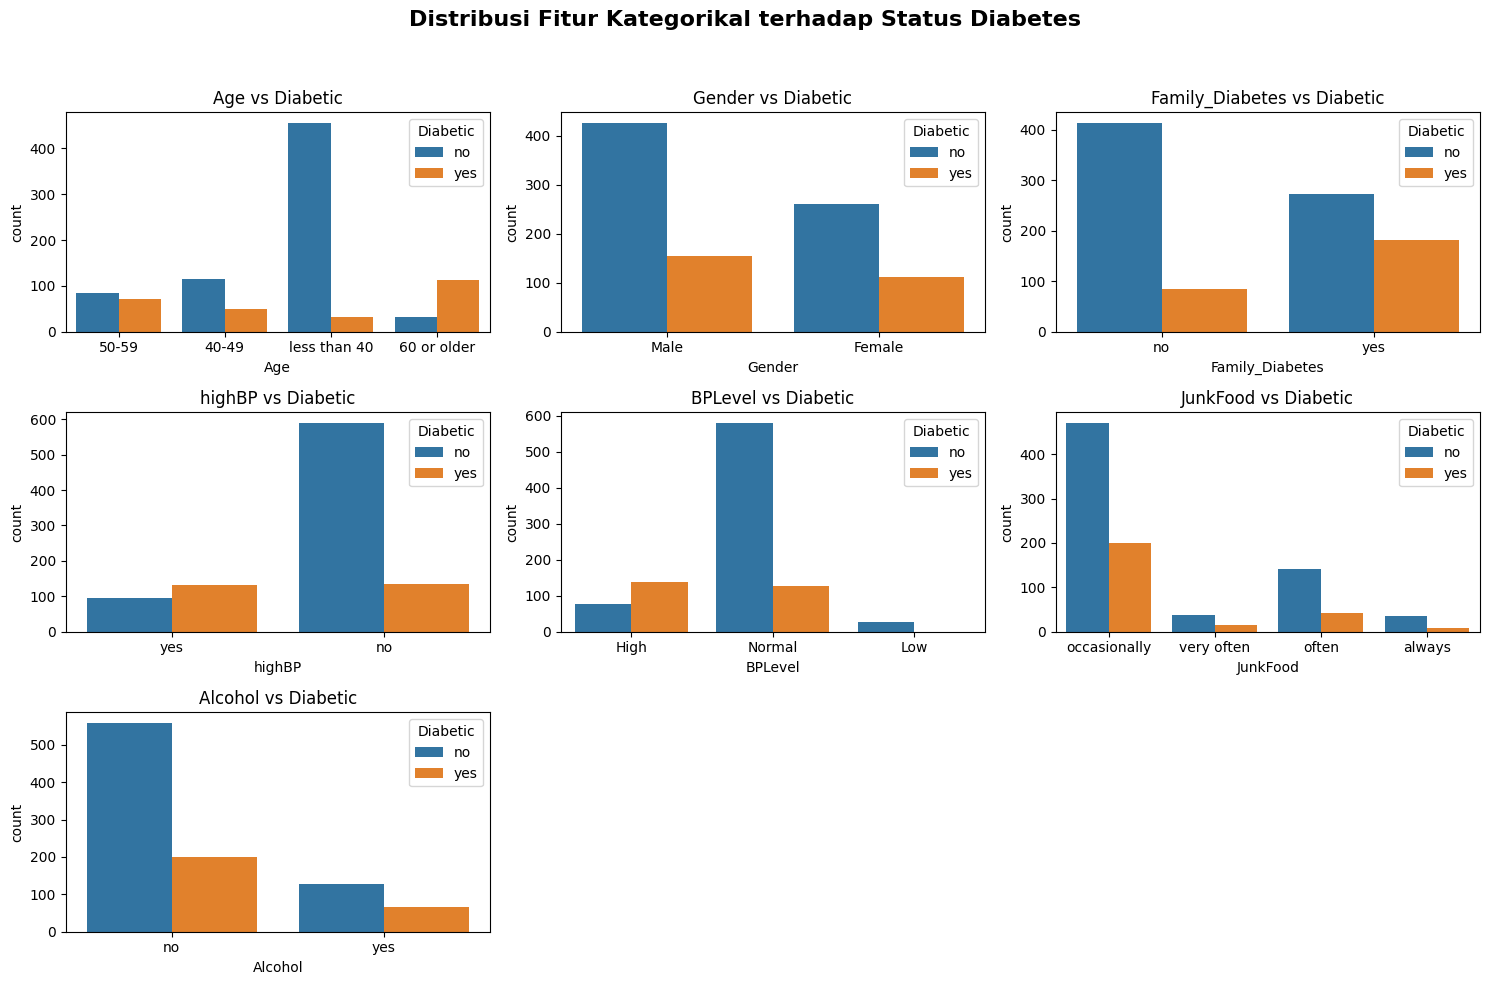

In [90]:
# Visualisasi hubungan fitur kategorik terhadap status diabetes
important_features = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'BPLevel', 'JunkFood', 'Alcohol']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Distribusi Fitur Kategorikal terhadap Status Diabetes', fontsize=16, fontweight='bold')
axes = axes.flatten()

cat_important = [c for c in important_features if c in categorical_cols and c != 'Diabetic']

for i, col in enumerate(cat_important):
    sns.countplot(data=df, x=col, hue='Diabetic', ax=axes[i])
    axes[i].tick_params(axis='x')
    axes[i].set_title(f'{col} vs Diabetic')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

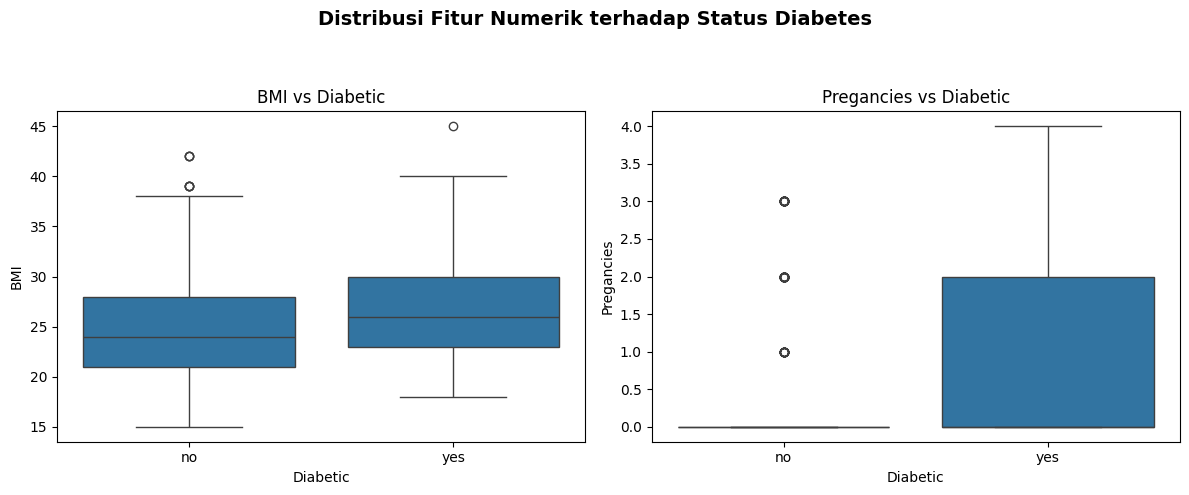

In [91]:
# Visualisasi hubungan fitur numerik terhadap status diabetes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Distribusi Fitur Numerik terhadap Status Diabetes', fontsize=14, fontweight='bold')

for i, col in enumerate(['BMI', 'Pregancies']):
    sns.boxplot(data=df, x='Diabetic', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetic')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

## **Data Preparation**

In [92]:
# Feature definition
TARGET_COLUMN = 'Diabetic'
num_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
cat_cols = [
    'Age', 'Gender', 'Family_Diabetes', 'highBP',
    'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood',
    'Stress', 'BPLevel', 'Pdiabetes', 'UriationFreq', 'RegularMedicine'
]

In [93]:
# Split menjadi data train dan data test
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("Train:", X_train.shape)
print("Test :", X_test.shape)

Train: (761, 17)
Test : (191, 17)


In [94]:
# Buat mapping ordinal untuk kolom yang memiliki urutan
ordinal_mappings = {
    'Age': {'less than 40': 0, '40-49': 1, '50-59': 2, '60 or older': 3},
    'PhysicallyActive': {
        'not active': 0,
        'less than half an hour': 1,
        'more than half an hour': 2,
        'one hour or more': 3
    },
    'Stress': {
        'not at all': 0,
        'sometimes': 1,
        'very often': 2,
        'always': 3
    },
    'JunkFood': {
        'occasionally': 0,
        'often': 1,
        'very often': 2,
        'always': 3
    },
    'UriationFreq': {
        'not much': 0,
        'quite often': 1
    },
    'BPLevel': {
        'Low': 0,
        'Normal': 1,
        'High': 2
    }
}

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [95]:
# Encoding untuk fitur kategori ordinal
for col, mapping in ordinal_mappings.items():
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [96]:
# One-Hot Encoding untuk fitur kategori nominal
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[nominal_cols])
X_test_ohe = ohe.transform(X_test[nominal_cols])

ohe_feature_names = ohe.get_feature_names_out(nominal_cols)

In [97]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

In [98]:
# Gabungkan semua fitur
X_train_final = np.hstack([
    X_train_num_scaled,
    X_train[ordinal_cols].values,
    X_train_ohe
])
X_test_final = np.hstack([
    X_test_num_scaled,
    X_test[ordinal_cols].values,
    X_test_ohe
])

In [99]:
# Gabungkan data train dan test
final_features = num_cols + ordinal_cols + list(ohe_feature_names)

# Buat DataFrame untuk train
df_train_final = pd.DataFrame(X_train_final, columns=final_features)
df_train_final[TARGET_COLUMN] = y_train.values
df_train_final["is_train"] = 1

# Buat DataFrame untuk test
df_test_final = pd.DataFrame(X_test_final, columns=final_features)
df_test_final[TARGET_COLUMN] = y_test.values
df_test_final["is_train"] = 0

# Gabungkan
df_all = pd.concat([df_train_final, df_test_final], axis=0).reset_index(drop=True)

In [100]:
# Menampilkan hasil preprocessing
df_all.head()

,BMI,Sleep,SoundSleep,Pregancies,Age,PhysicallyActive,Stress,JunkFood,UriationFreq,BPLevel,Gender_Male,Family_Diabetes_yes,highBP_yes,Smoking_yes,Alcohol_yes,Pdiabetes_yes,RegularMedicine_yes,Diabetic,is_train
0,-0.531468,0.815986,0.277029,-0.379345,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,no,1
1,1.334925,-0.754091,-0.793119,-0.379345,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,1
2,-0.718108,0.815986,0.277029,-0.379345,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,no,1
3,1.334925,-0.754091,-0.258045,1.977240,3.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,yes,1
4,0.775007,0.815986,1.347178,-0.379345,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,yes,1


In [101]:
# Simpan hasil preprocessing
df_all.to_csv('diabetes_dataset_2019_preprocessing.csv', index=False)

In [102]:
# Import fungsi otomatis dari file automate_Rosita_Angel_Cahyadi.py
import os
if not os.path.exists('/content/drive'):
    from google.colab import drive
    drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from automate_Rosita_Angel_Cahyadi import full_preprocessing_pipeline

df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_dataset_2019_raw.csv')

# Jalankan preprocessing
df_automate = full_preprocessing_pipeline(
    df_raw,
    output_csv_path="/content/drive/MyDrive/Colab Notebooks/diabetes_dataset_2019_preprocessing.csv"
)

Train: (761, 17)
Test : (191, 17)

PREPROCESSING SELESAI!
File disimpan di: /content/drive/MyDrive/Colab Notebooks/diabetes_dataset_2019_preprocessing.csv


In [103]:
# Membaca hasil prepocessing dari fungsi automate yang telah dibuat
df_automate.head()

,BMI,Sleep,SoundSleep,Pregancies,Age,PhysicallyActive,Stress,JunkFood,UriationFreq,BPLevel,Gender_Male,Family_Diabetes_yes,highBP_yes,Smoking_yes,Alcohol_yes,RegularMedicine_yes,Pdiabetes_yes,Diabetic,is_train
0,-0.531468,0.815986,0.277029,-0.379345,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,no,1
1,1.334925,-0.754091,-0.793119,-0.379345,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,1
2,-0.718108,0.815986,0.277029,-0.379345,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,no,1
3,1.334925,-0.754091,-0.258045,1.977240,3.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,yes,1
4,0.775007,0.815986,1.347178,-0.379345,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes,1


In [104]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>